In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format
scaled_df = pd.read_csv('../data/scaled_data.csv').set_index('customer_id')

In [4]:
scaled_df.head()

,total_buy_cnt,total_price
customer_id,,
12395,-0.05,-0.15
12427,-0.07,0.21
12431,0.23,0.95
12471,-1.13,-1.02
12472,-0.19,0.21


In [5]:
# KMeans
model = KMeans(n_clusters=4, random_state=123)
model.fit(scaled_df)

scaled_df['label'] = model.predict(scaled_df)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
pd.DataFrame(scaled_df['label'].value_counts())

,count
label,
2,84
0,77
3,43
1,21


<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

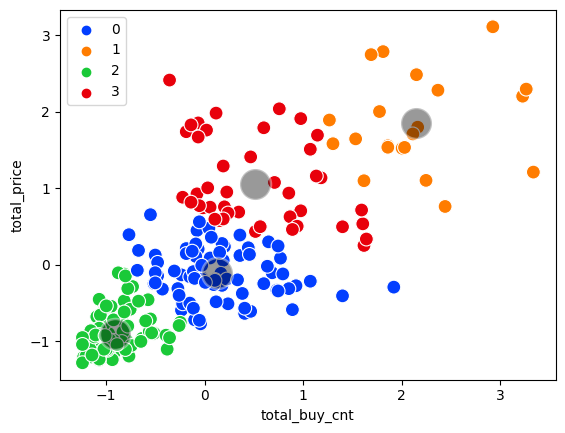

In [15]:
import seaborn as sns

center = model.cluster_centers_

sns.scatterplot(data=scaled_df, x='total_buy_cnt', y='total_price', hue='label', s=100, palette='bright')
sns.scatterplot(x=center[:,0], y=center[:,1],color='black', alpha=0.4, s=500)

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

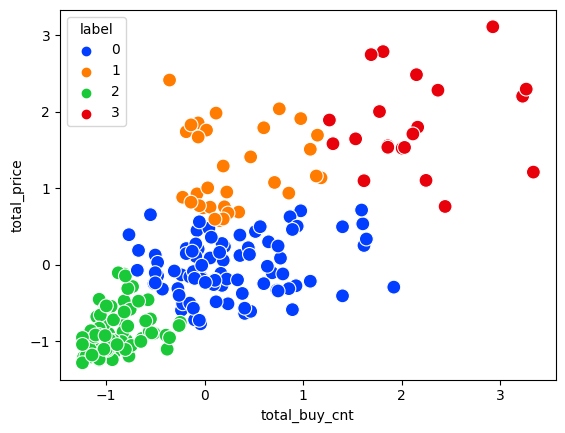

In [18]:
# from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
model = linkage(scaled_df, 'ward')
labelList = scaled_df.index

cluster_num = 4

scaled_df['label'] = cut_tree(model, cluster_num)
sns.scatterplot(x=scaled_df['total_buy_cnt'], y=scaled_df['total_price'], hue=scaled_df['label'], s=100, palette='bright')